In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import numpy as np

In [2]:
time_results = pd.read_csv("results_heuristiques/time_heuristic_true.csv")
value_results = pd.read_csv("results_heuristiques/value_heuristic_true.csv")

heuristics_codes = ["CW", "LK", "2opt", "3opt", "hybrid_rc", "hybrid_mc"]
heuristics_names =["Clark-Wright", "Lin-Kernighan", "2-opt on each route", "3-opt on each route", "Swap 2opt between routes (Real cost)","Swap 2opt between routes (Max cost)"]


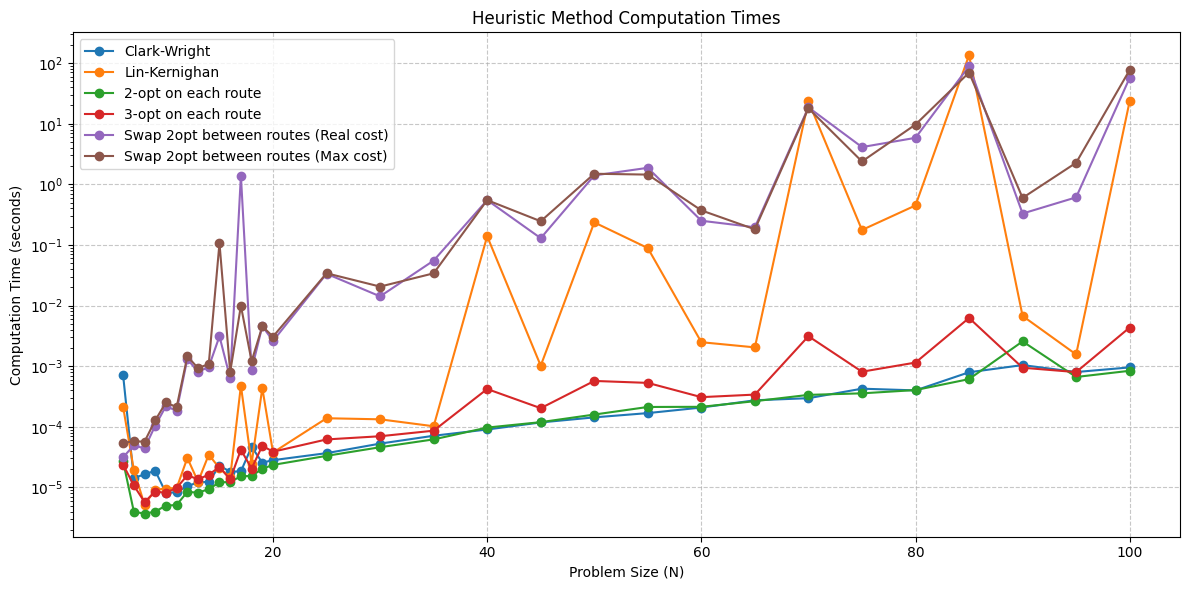

In [3]:
N = time_results.n.values

plt.figure(figsize=(12, 6))

for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    plt.semilogy(N, time_results[code].values, label=name, marker='o')

plt.xlabel('Problem Size (N)')
plt.ylabel('Computation Time (seconds)')
plt.title('Heuristic Method Computation Times')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

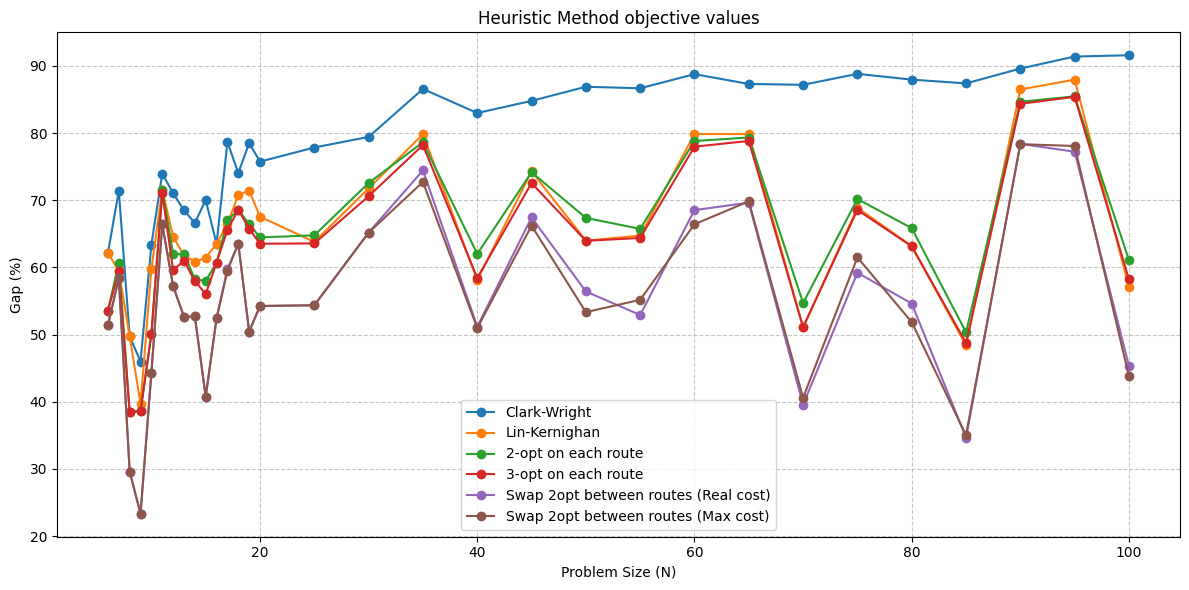

In [4]:
N = value_results.n.values

plt.figure(figsize=(12, 6))

for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    Y = 100*(value_results[code].values - value_results["borne_inf"].values)/value_results[code].values
    plt.plot(N, Y, label=name, marker='o')

plt.xlabel('Problem Size (N)')
plt.ylabel('Gap (%)')
plt.title('Heuristic Method objective values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

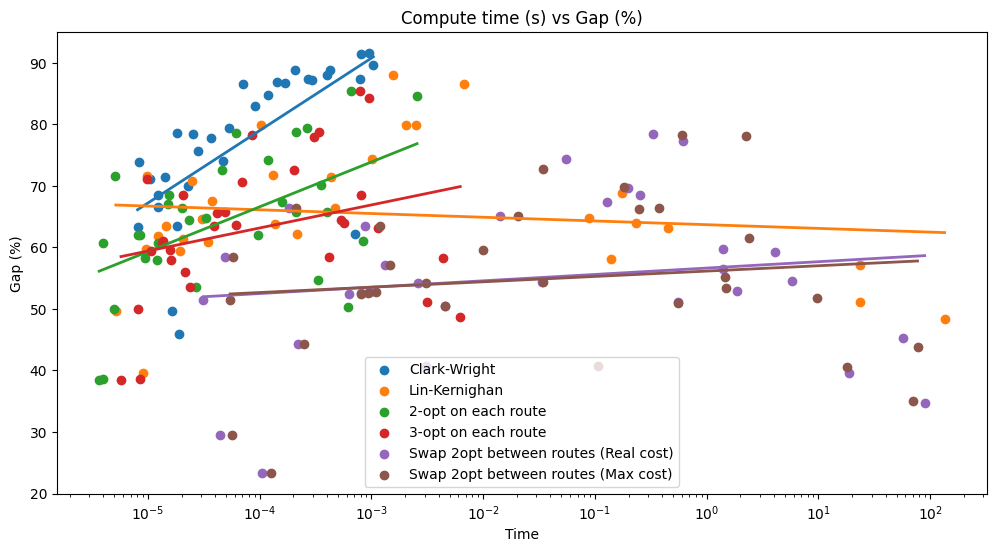

In [ ]:
plt.figure(figsize=(12, 6))

for i in range(len(heuristics_codes)):
    code = heuristics_codes[i]
    name = heuristics_names[i]
    
    Y = 100 * (value_results[code].values - value_results["borne_inf"].values) / value_results[code].values
    X = time_results[code].values
    log_X = [np.log10(x) for x in X]

    X_reshaped = np.array(log_X).reshape(-1, 1)
    
    reg = linear_model.LinearRegression()
    reg.fit(X_reshaped, Y)
    
    plt.scatter(X, Y, label=name, marker='o')
    
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_log = [np.log10(x) for x in X_range]
    Y_pred = reg.predict(X_range_log)
    
    # Plot the regression line
    plt.plot(X_range, Y_pred, linewidth=2, ls='-')

# Set y-axis to logarithmic scale
plt.xscale('log')

plt.xlabel("Time")
plt.ylabel("Gap (%)")
plt.title("Compute time (s) vs Gap (%)")
plt.legend()
plt.show()
